In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
matplotlib.rcParams["font.family"] = "sans-serif"

import scipy
import scipy.misc
import scipy.cluster


def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)

    
    
def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [5]:
path_to_image = 'C:/Users/admin/Desktop/fox.jpg'

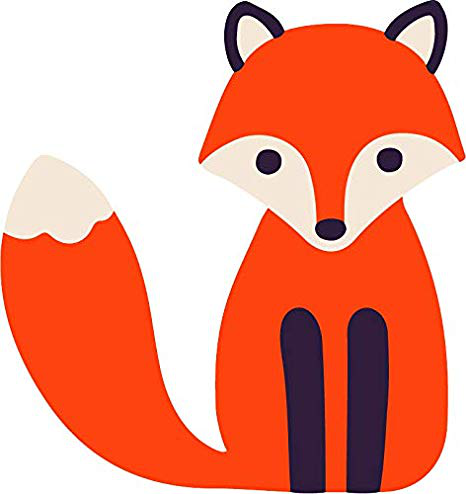

In [6]:
im = Image.open(path_to_image)
im

In [72]:
new_im2, new_rgbs2 = convert_image_specific(im, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]) 
#RGB lists given to images


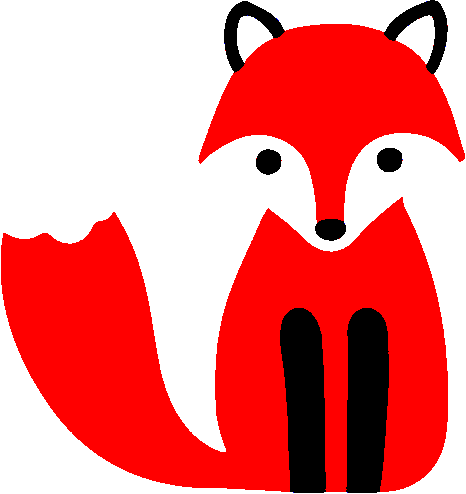

In [8]:
new_im2

In [9]:
#using numpy array to store image data
new_im2_data = np.array(new_im2)
new_im2_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

In [10]:
#Checking for unique colors in an image
np.unique(new_im2_data.reshape(-1,new_im2_data.shape[2]),axis=0)

array([[  0,   0,   0],
       [  0,   0, 255],
       [255,   0,   0],
       [255, 255, 255]], dtype=uint8)

In [13]:
np.unique(new_im2_data)

array([  0, 255], dtype=uint8)

In [14]:
new_im2.show()

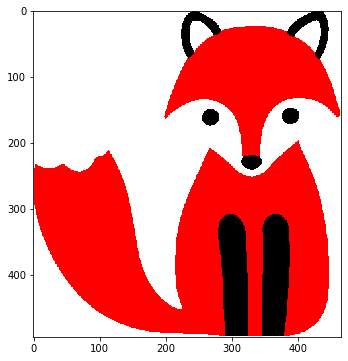

In [15]:
fig, ax= plt.subplots(figsize=(6,6))
ax.imshow(new_im2_data)
plt.show()

In [16]:
number_of_pixels_of_a_color = [] # number of pixels for a particular color
color_labels = [] # labels for histogram
color_values = [] # RGBA sequences

In [17]:
unique_colors = np.unique(new_im2_data.reshape(-1, new_im2_data.shape[2]), axis=0)
unique_colors

array([[  0,   0,   0],
       [  0,   0, 255],
       [255,   0,   0],
       [255, 255, 255]], dtype=uint8)

In [18]:
for icolor,rgba in enumerate(unique_colors):
  
    #Mask out pixels at a particular color
    reds_mask = new_im2_data[:,:,0] == rgba[0] 
    greens_mask = new_im2_data[:,:,1] == rgba[1]
    blues_mask = new_im2_data[:,:,2] == rgba[2]
  

    pixel_mask = reds_mask & greens_mask & blues_mask 
      
    
    #Count up all pixels
    npixels = len(new_im2_data[pixel_mask])
    
    # store the number of pixels 
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    color_labels.append("Color #" + str(icolor))
    color_values.append(rgba/255) #converting to matplotlib bar
    

In [19]:
color_labels

['Color #0', 'Color #1', 'Color #2', 'Color #3']

In [20]:
color_values

[array([ 0.,  0.,  0.]),
 array([ 0.,  0.,  1.]),
 array([ 1.,  0.,  0.]),
 array([ 1.,  1.,  1.])]

In [21]:
number_of_pixels_of_a_color

[18550, 13, 100679, 110962]

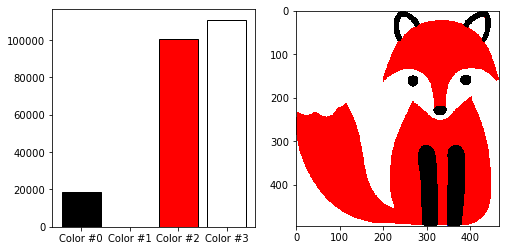

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) 
ax[1].imshow(new_im2_data)

#setting colors of each bar individually
for i in range(len(myBarChart)): 
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

# This histogram represents the breakdown of different colors  present in the image

# Second Image

In [24]:
path_im3 = 'C:/Users/admin/Desktop/mario.jpg'

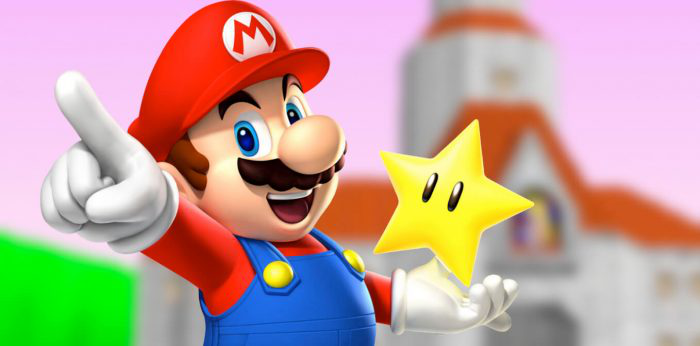

In [25]:
im3 = Image.open(path_im3)
im3

In [45]:
new_im5, new_rgbs = convert_image(im3, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 210.73305085  199.0579096   189.09312458]
 [ 169.56613403  148.85980705  138.04884142]
 [  86.03955821   22.30102558   13.95920207]
 [ 211.16151009   59.80173761   25.11219451]
 [   4.65367683  235.91366379    8.12449046]
 [  27.32814588   92.33215437  195.73646153]
 [ 248.0563179   206.21698113  246.18070066]
 [ 251.38269506  241.38180029   54.33938797]]


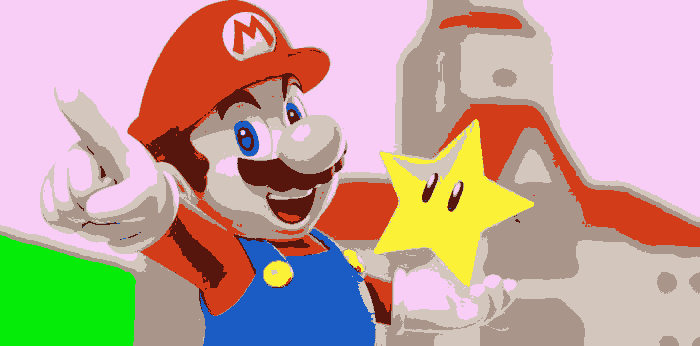

In [46]:
new_im5

In [47]:
new_im5_data = np.array(new_im5)
new_im5_data

array([[[248, 206, 246],
        [248, 206, 246],
        [248, 206, 246],
        ..., 
        [248, 206, 246],
        [248, 206, 246],
        [248, 206, 246]],

       [[248, 206, 246],
        [248, 206, 246],
        [248, 206, 246],
        ..., 
        [248, 206, 246],
        [248, 206, 246],
        [248, 206, 246]],

       [[248, 206, 246],
        [248, 206, 246],
        [248, 206, 246],
        ..., 
        [248, 206, 246],
        [248, 206, 246],
        [248, 206, 246]],

       ..., 
       [[  5, 236,   8],
        [  5, 236,   8],
        [  5, 236,   8],
        ..., 
        [170, 149, 138],
        [170, 149, 138],
        [170, 149, 138]],

       [[  5, 236,   8],
        [  5, 236,   8],
        [  5, 236,   8],
        ..., 
        [170, 149, 138],
        [170, 149, 138],
        [170, 149, 138]],

       [[  5, 236,   8],
        [  5, 236,   8],
        [  5, 236,   8],
        ..., 
        [170, 149, 138],
        [170, 149, 138],
        [170, 149,

In [48]:
np.unique(new_im5_data.reshape(-1,new_im5_data.shape[2]),axis=0)

array([[  5, 236,   8],
       [ 27,  92, 196],
       [ 86,  22,  14],
       [170, 149, 138],
       [211,  60,  25],
       [211, 199, 189],
       [248, 206, 246],
       [251, 241,  54]], dtype=uint8)

In [49]:
np.unique(new_im5_data)

array([  5,   8,  14,  22,  25,  27,  54,  60,  86,  92, 138, 149, 170,
       189, 196, 199, 206, 211, 236, 241, 246, 248, 251], dtype=uint8)

In [50]:
new_im5.show()

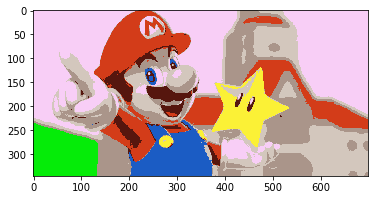

In [51]:
fig, ax= plt.subplots(figsize=(6,6))
ax.imshow(new_im5_data)
plt.show()

In [52]:
number_of_pixels_of_a_color2 = [] # num of pixels at a particular color
color_labels2 = [] # how we label those colors on our histogram
color_values2 = [] # RGBA sequences

In [53]:
unique_colors2 = np.unique(new_im5_data.reshape(-1, new_im5_data.shape[2]), axis=0)
unique_colors2

array([[  5, 236,   8],
       [ 27,  92, 196],
       [ 86,  22,  14],
       [170, 149, 138],
       [211,  60,  25],
       [211, 199, 189],
       [248, 206, 246],
       [251, 241,  54]], dtype=uint8)

In [54]:
for icolor,rgba in enumerate(unique_colors2):

    reds_mask = new_im5_data[:,:,0] == rgba[0] 
    greens_mask = new_im5_data[:,:,1] == rgba[1]
    blues_mask = new_im5_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask 
      
    

    npixels = len(new_im5_data[pixel_mask])
    
    
    number_of_pixels_of_a_color2.append(npixels) 
    color_labels2.append("Color #" + str(icolor))
    color_values2.append(rgba/255)

In [55]:
color_labels2

['Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #4',
 'Color #5',
 'Color #6',
 'Color #7']

In [56]:
color_values2

[array([ 0.01960784,  0.9254902 ,  0.03137255]),
 array([ 0.10588235,  0.36078431,  0.76862745]),
 array([ 0.3372549 ,  0.08627451,  0.05490196]),
 array([ 0.66666667,  0.58431373,  0.54117647]),
 array([ 0.82745098,  0.23529412,  0.09803922]),
 array([ 0.82745098,  0.78039216,  0.74117647]),
 array([ 0.97254902,  0.80784314,  0.96470588]),
 array([ 0.98431373,  0.94509804,  0.21176471])]

In [57]:
number_of_pixels_of_a_color2

[12327, 12699, 8983, 45465, 32476, 42041, 77250, 10959]

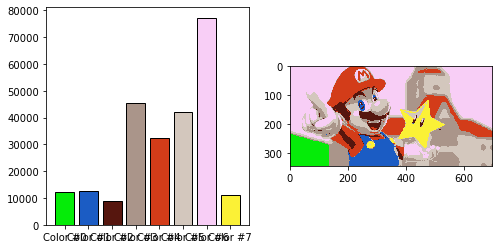

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

myBarChart2 = ax[0].bar(color_labels2, number_of_pixels_of_a_color2) # now I have a *vector* of axes
ax[1].imshow(new_im5_data)

# set colors of each bar individually
for i in range(len(myBarChart2)): # for all bars in my barchart
    myBarChart2[i].set_color(color_values2[i])
    myBarChart2[i].set_edgecolor('black')
    
plt.show()

# These are the most common colors present in the image represented as  histograms

In [64]:
path4 = 'C:/Users/admin/Desktop/bird.jpeg'

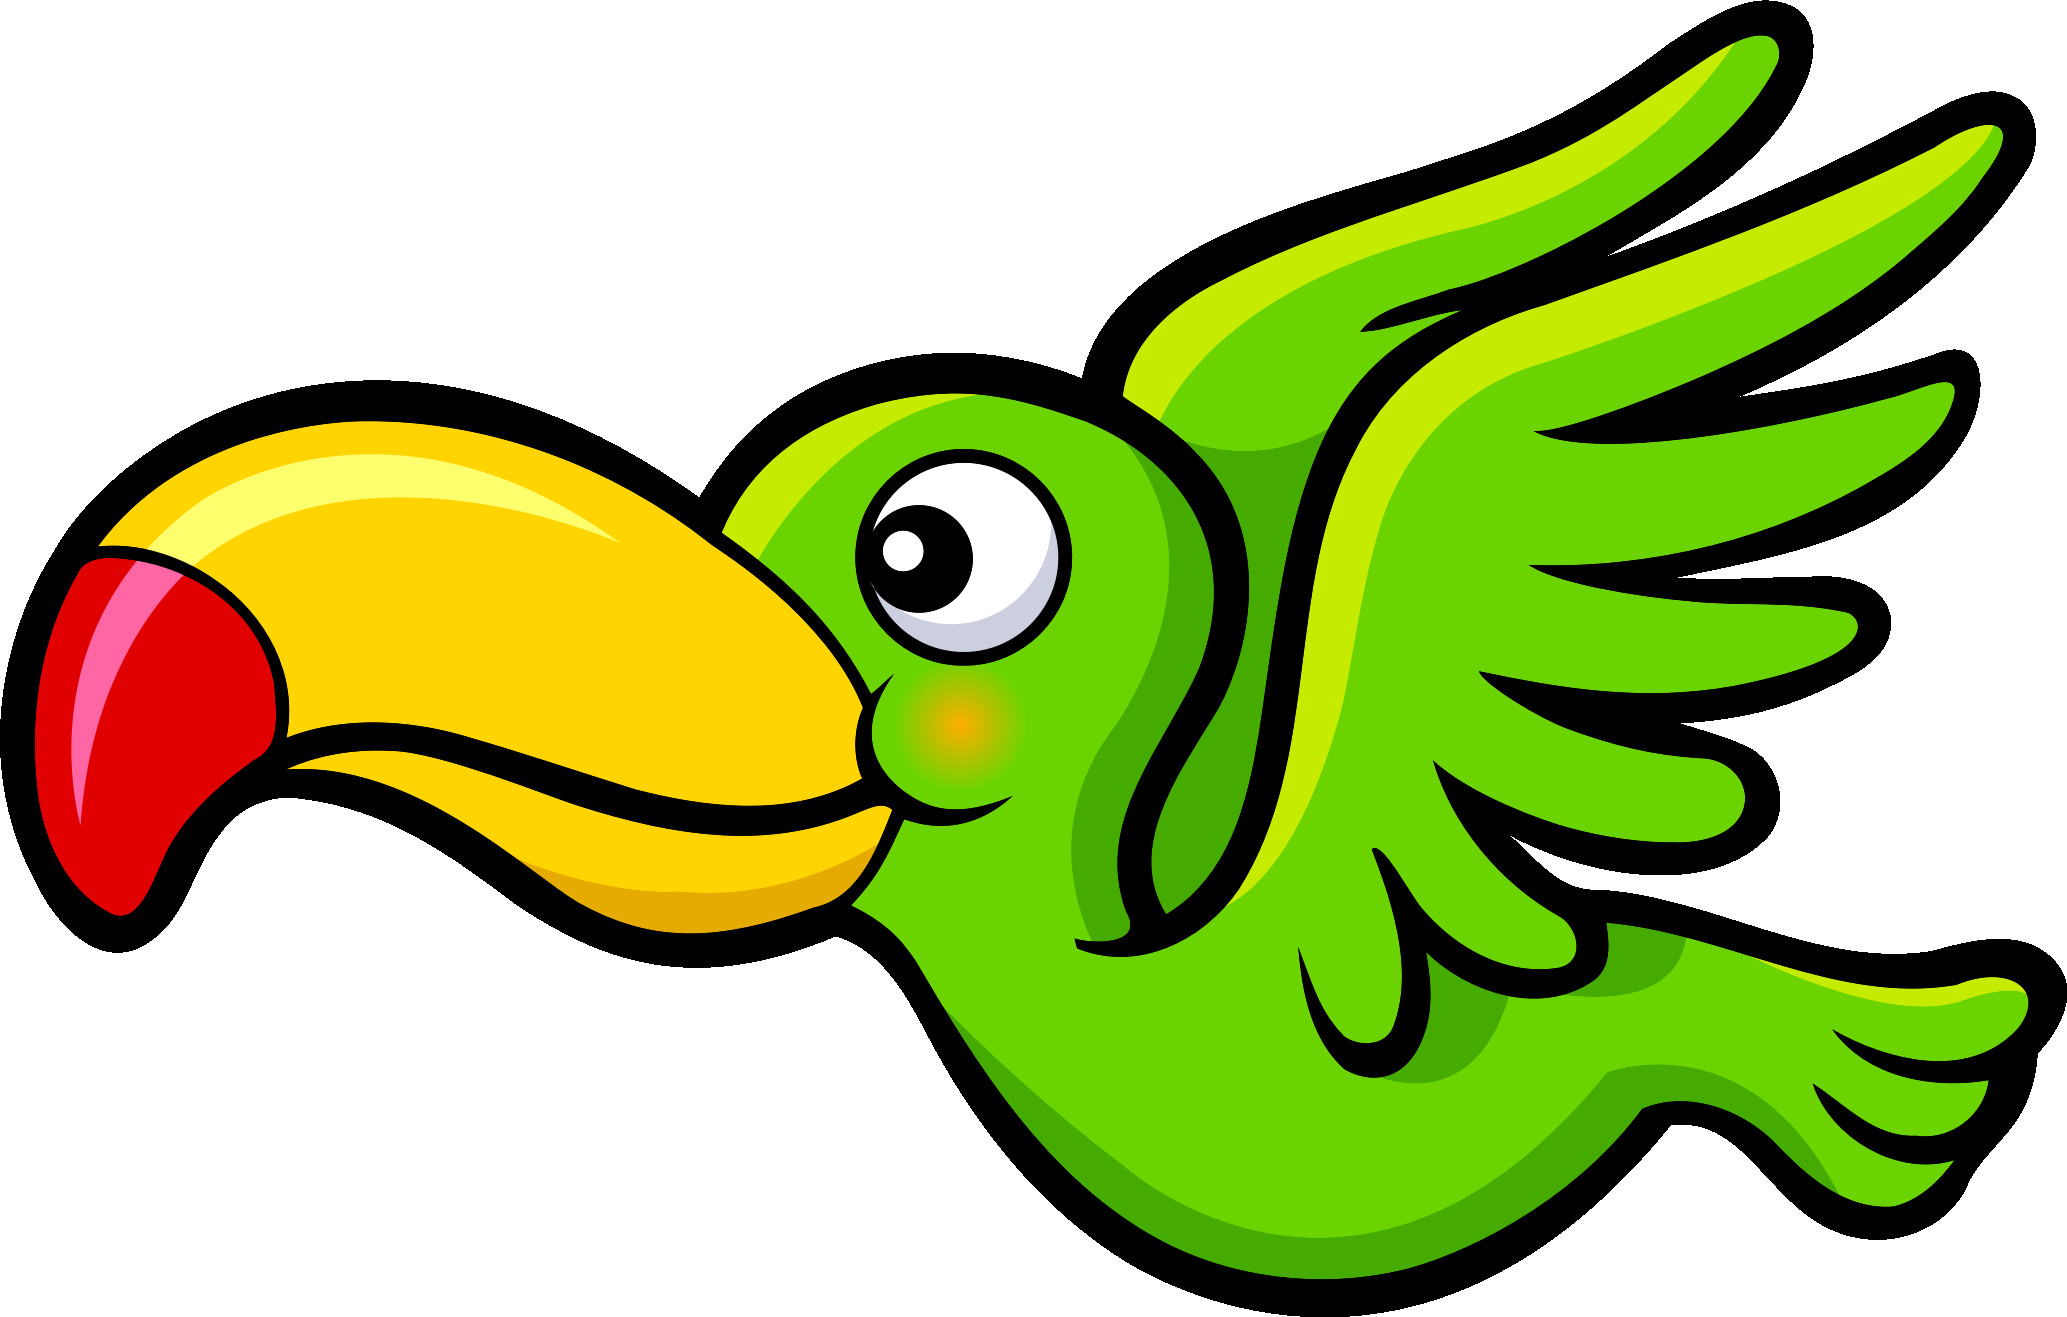

In [65]:
im4 = Image.open(path4)
im4

In [67]:
new_im4, new_rgbs4 = convert_image_specific(im4, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])


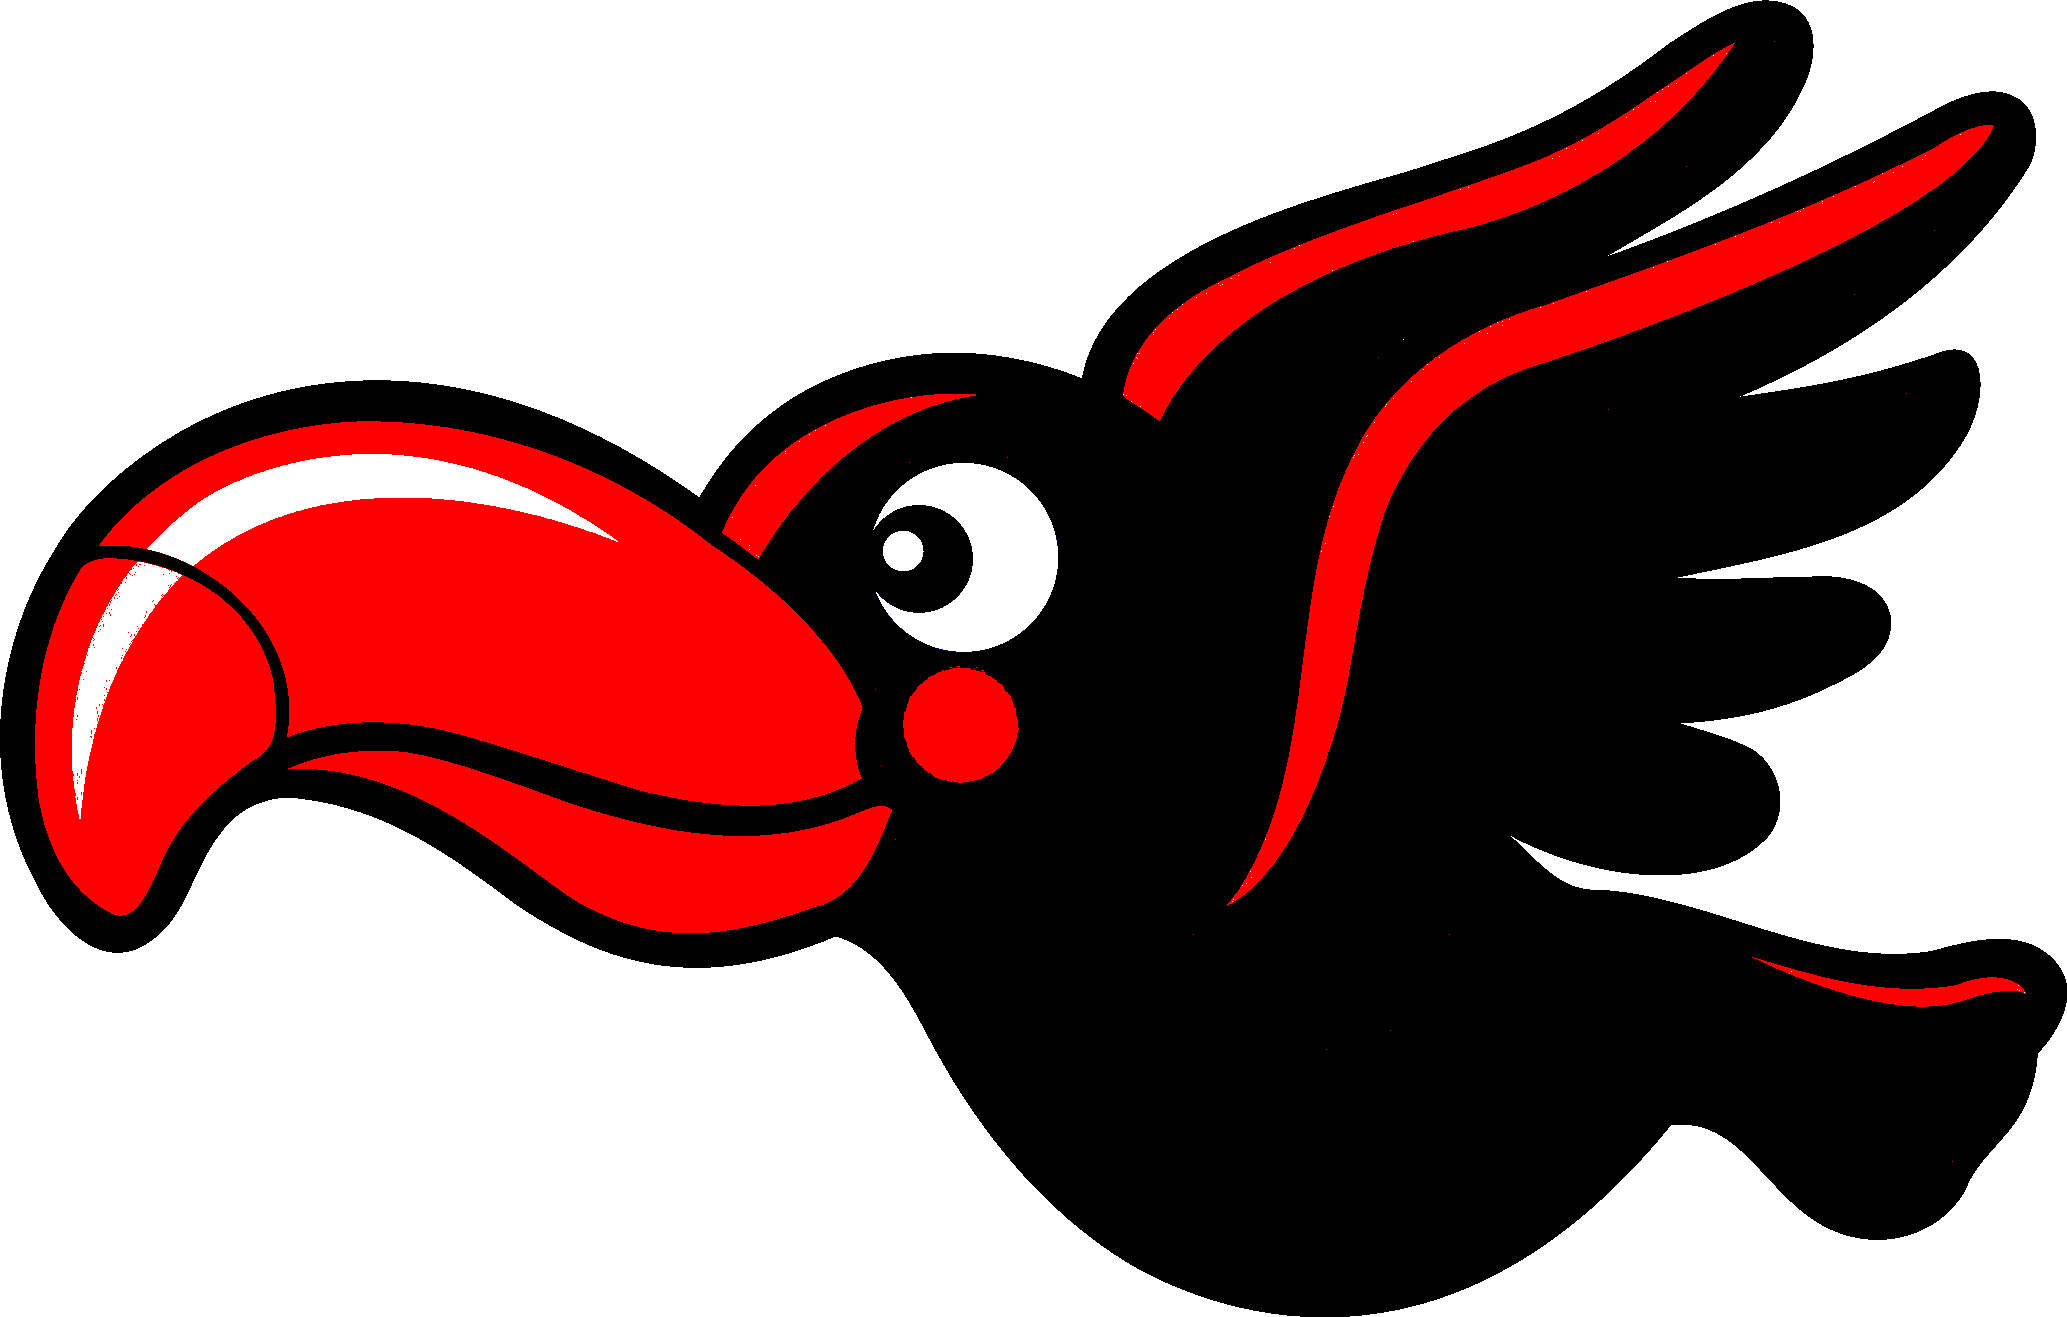

In [68]:
new_im4

In [69]:
new_im4_data = np.array(new_im4)
new_im4_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

In [46]:
np.unique(new_im4_data.reshape(-1,new_im4_data.shape[2]),axis=0)

array([[  0,   0,   0],
       [  0,   0, 255],
       [255,   0,   0],
       [255, 255, 255]], dtype=uint8)

In [47]:
np.unique(new_im4_data)

array([  0, 255], dtype=uint8)

In [48]:
new_im4.show()

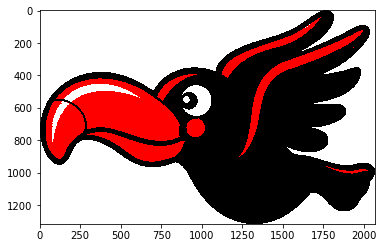

In [49]:
fig, ax= plt.subplots(figsize=(6,6))
ax.imshow(new_im4_data)
plt.show()

In [50]:
number_of_pixels_of_a_color3 = [] # num of pixels at a particular color
color_labels3 = [] # labelling colors on histogram
color_values3 = [] # RGBA sequences

In [51]:
unique_colors3 = np.unique(new_im4_data.reshape(-1, new_im4_data.shape[2]), axis=0)
unique_colors3

array([[  0,   0,   0],
       [  0,   0, 255],
       [255,   0,   0],
       [255, 255, 255]], dtype=uint8)

In [52]:
for icolor,rgba in enumerate(unique_colors3):

    # Mask out pixels for a particular color
    reds_mask = new_im4_data[:,:,0] == rgba[0] 
    greens_mask = new_im4_data[:,:,1] == rgba[1]
    blues_mask = new_im4_data[:,:,2] == rgba[2]
    

    pixel_mask = reds_mask & greens_mask & blues_mask 
      
    
    # count up all pixels
    npixels = len(new_im4_data[pixel_mask])
    
    # store the number of pixels 
    number_of_pixels_of_a_color3.append(npixels) 
    # naming the colors
    color_labels3.append("Color #" + str(icolor))
    # last thing: color values
    color_values3.append(rgba/255) # this is converting to matplotlib bar
    

In [53]:
color_labels3

['Color #0', 'Color #1', 'Color #2', 'Color #3']

In [54]:
color_values3

[array([ 0.,  0.,  0.]),
 array([ 0.,  0.,  1.]),
 array([ 1.,  0.,  0.]),
 array([ 1.,  1.,  1.])]

In [55]:
number_of_pixels_of_a_color3

[1058350, 11, 354737, 1309141]

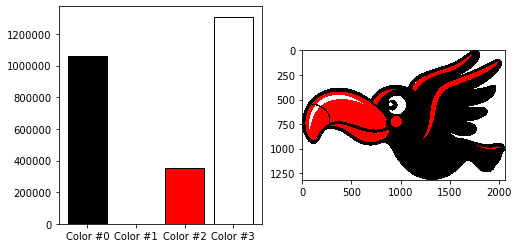

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

myBarChart3 = ax[0].bar(color_labels3, number_of_pixels_of_a_color3) # now I have a *vector* of axes
ax[1].imshow(new_im4_data)

# set colors of each bar individually
for i in range(len(myBarChart3)): # for all bars in my barchart
    myBarChart3[i].set_color(color_values3[i])
    myBarChart3[i].set_edgecolor('black')
    
plt.show()

This histogram represents the breakdown of colors in the bird image

We can see that the first and third image has less than 8 colors hence we have downsampled them to images that contain a sequence of colors defined by us.

# Color Rebinning

Color Rebinning an image just makes the image loose its clarity, in some cases the colors may not be downsampled correctly, for instance in the third image of the bird, the entire beak is assigned as red, this may cause a problem incase you want to reconstruct the image and get it back to its original color. It would be hard to differentiate that the beak has two color values. After color is rebinned in an image, some colors may stand out more than the others.